In [1]:
import itertools, json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import colors

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *

from common import *

In [2]:
L = 9

In [3]:
observables = ['fi', 'fij', 'cij', 'fijk', 'cijk', 'fold_ijk']
observables_dict = {key: dict() for key in observables}
for dataset in ['train', 'test']:
    params = np.load('data/%s_observables_L%i.npz'%(dataset, L))
    for observable in observables:
        observables_dict[observable][dataset] = params[observable]

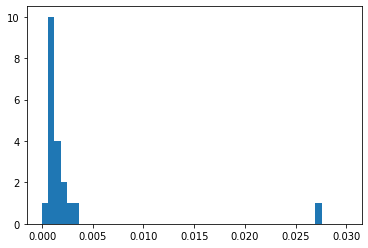

In [4]:
fi = observables_dict['fi']['train']
plt.hist((np.std(fi, axis=0)/np.abs(np.mean(fi, axis=0))).flatten(), bins=np.linspace(0.0, 0.03, 50));

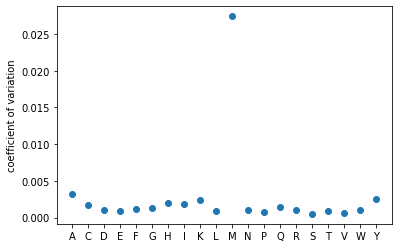

In [5]:
plt.plot(np.std(fi, axis=0)/np.mean(fi, axis=0), 'o')
plt.ylabel('coefficient of variation')
plt.xticks(range(len(aminoacids)), (list(aminoacids)));

--> Weak dependence on position for Methionine (edge effect because this is the amino acid coded for by the start codon), all others essentially zero

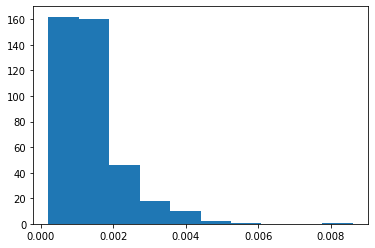

In [6]:
fijs = np.array([list(observables_dict['fij']['train'][i, i+1]) for i in range(1, L-1)])
plt.hist((np.std(fijs, axis=0)/np.abs(np.mean(fijs, axis=0))).flatten());

--> pair frequencies between nearest neighbors are (nearly) translation invariant

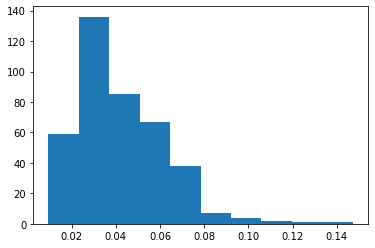

In [7]:
fijs = observables_dict['fij']['train'][0, 1:]
plt.hist((np.std(fijs, axis=0)/np.abs(np.mean(fijs, axis=0))).flatten());

--> pair frequencies depend on distance

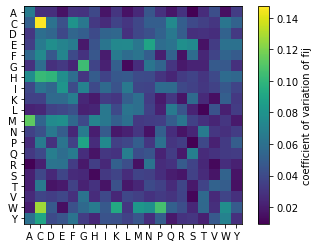

In [8]:
plt.imshow(np.std(fijs, axis=0)/np.abs(np.mean(fijs, axis=0)))
plt.colorbar(label='coefficient of variation of fij')
set_aminoacidslabel(plt.gca(), aminoacids)

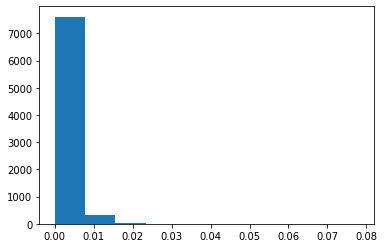

In [9]:
fijks = np.array([list(observables_dict['fijk']['train'][i, i+1, i+2]) for i in range(1, L-2)])
plt.hist((np.std(fijks, axis=0)/np.abs(np.mean(fijks, axis=0))).flatten());

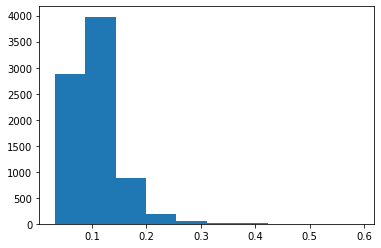

In [10]:
fijks = np.array([list(observables_dict['fijk']['train'][0, i, j]) for i in range(1, L) for j in range(i+1, L)])
plt.hist((np.std(fijks, axis=0)/np.abs(np.mean(fijks, axis=0))).flatten());